# HOS Confronto 

## Confronto Pollino

In [1]:
# confronto tutte 
import pandas as pd

S6l = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_6_lowpass.csv")     # filter [8,10,15,20]     windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]
S4l = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_4_lowpass.csv")     # filter [8,10,15,20]     windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]
S6h = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_6_highpass.csv")    # filter [1,2,3,5,10]     windowin [40,50,80,100,150,200]   tresh [0.1,0.2,0.25,0.3,0.4,1.0]
S4h = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_4_highpass.csv")    # filter [1,2,3,5]        windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]

bonta_th = 5

bonta_S4l = []
bonta_S6l = []
bonta_S4h = []
bonta_S6h = []

for key in S4l.iloc[:,2:]:
    diff = S4l["trace_P_arrival_sample"] - S4l[key]
    bonta_S4l.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S6l.iloc[:,2:]:
    diff = S6l["trace_P_arrival_sample"] - S6l[key]
    bonta_S6l.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S4h.iloc[:,2:]:
    diff = S4h["trace_P_arrival_sample"] - S4h[key]
    bonta_S4h.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S6h.iloc[:,2:]:
    diff = S6h["trace_P_arrival_sample"] - S6h[key]
    bonta_S6h.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

Text(0.5, 0.98, 'Percentages of picks with error <= 5 for Pollino various settings')

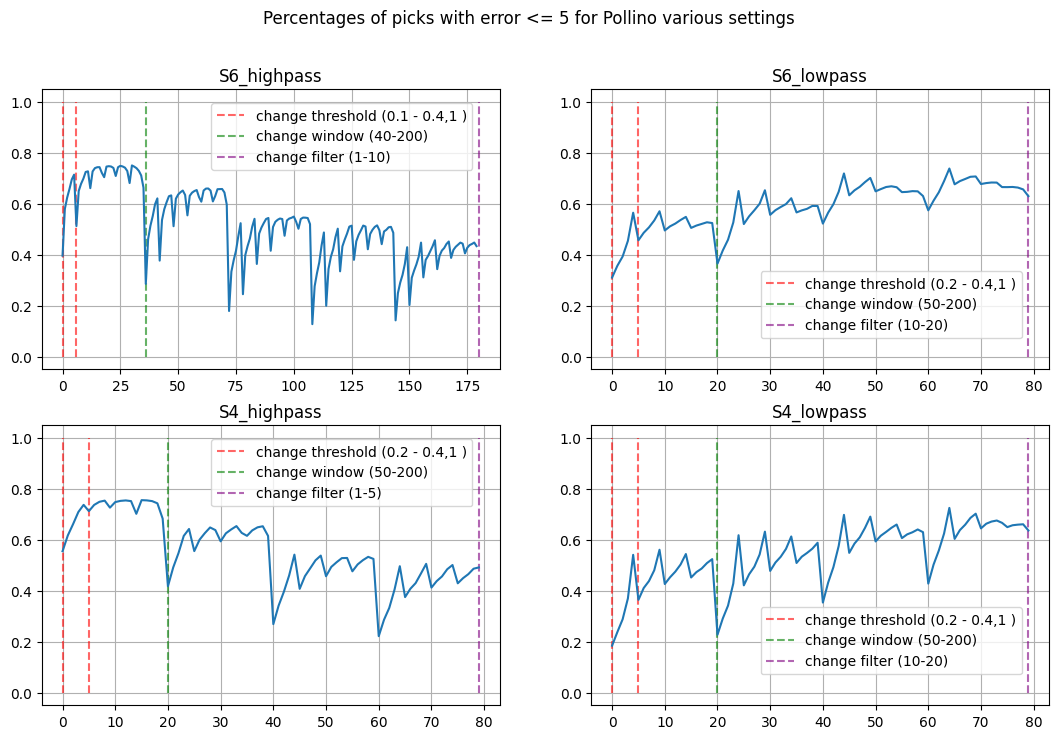

In [2]:
fig, axi = plt.subplots(2, 2, figsize=(13, 8))

axi[0][0].plot(bonta_S6h,zorder=51)
axi[0][0].vlines([0,6],0,1, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
axi[0][0].vlines(36,0,1, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (40-200)")
axi[0][0].vlines(180,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (1-10)")
axi[0][0].legend(bbox_to_anchor=(0.37, 0.95), loc='upper left', borderaxespad=0)
axi[0][0].set_title("S6_highpass")
axi[0][0].grid()

axi[0][1].plot(bonta_S6l,zorder=51)
axi[0][1].vlines([0,5],0,1, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[0][1].vlines(20,0,1, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[0][1].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (10-20)")
axi[0][1].legend(bbox_to_anchor=(0.37, 0.35), loc='upper left', borderaxespad=0)
axi[0][1].set_title("S6_lowpass")
axi[0][1].grid()

axi[1][0].plot(bonta_S4h, zorder=51)
axi[1][0].vlines([0,5],0,1, color="red", zorder=50, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[1][0].vlines(20,0,1, color="green", zorder=50, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[1][0].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (1-5)")
axi[1][0].legend(bbox_to_anchor=(0.37, 0.95), loc='upper left', borderaxespad=0)
axi[1][0].set_title("S4_highpass")
axi[1][0].grid()

axi[1][1].plot(bonta_S4l,zorder=51)
axi[1][1].vlines([0,5],0,1, color="red", zorder=50, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[1][1].vlines(20,0,1, color="green", zorder=50, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[1][1].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (10-20)")
axi[1][1].legend(bbox_to_anchor=(0.37, 0.35), loc='upper left', borderaxespad=0)
axi[1][1].set_title("S4_lowpass")
axi[1][1].grid()
fig.suptitle("Percentages of picks with error <= 5 for Pollino various settings")
#fig.savefig("/home/silvia/Desktop/Immagini/_HOS_Pollino_err_LE_5")


In [12]:
# verify number picks in [lower, upper]
import numpy as np
from Classe_sismogramma_v3 import  ClasseDataset
import pandas as pd
#hd = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_data_extended.hdf5"
#cs = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_metadata_extended.csv"
hd = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
lower = []
for i in range(len(D.sismogramma)):
    ky = "stat: <function S_6 at 0x7f171781daf0> type_filter: highpass filter freq: 1 window_width: 150 tresh: 0.2_ons_max"
    lower.append(np.argmax(np.abs(D.sismogramma[i])) - 1000)
    #ons_2[ky][i] += np.argmax(np.abs(D.sismogramma[i])) - 500
lower_b = pd.DataFrame.from_dict({"lower": lower })


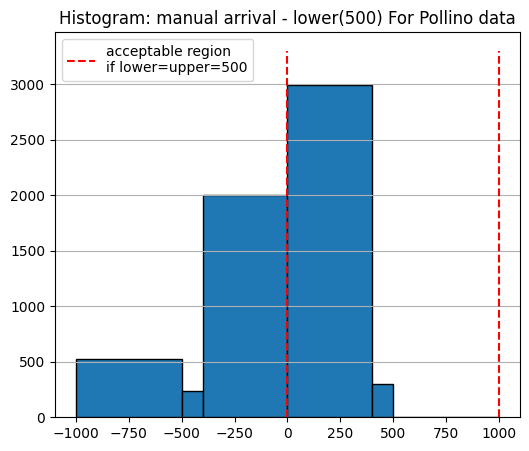

In [13]:
fig, ax0 = plt.subplots(1, 1, figsize=(6, 5))
A = (ons_2["trace_P_arrival_sample"] - lower_b["lower"]).hist(bins=[-1000,-500,-400,0,400,500,1000], edgecolor="black", ax=ax0)
ax0.grid(axis='x')
ax0.set_title("Histogram: manual arrival - lower(500) For Pollino data")
ax0.vlines([0,1000], 0, 3300, color="red", linestyles="--", label="acceptable region \nif lower=upper=500" )
plt.legend(loc="upper left")


## Confronto Detect

In [2]:
import pandas as pd

ons_2 = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_alredypicked_get_onset_4_search_intorno_maxhos_bound200_plus_window_after_origintime_entro_8_s_dopo.csv")

In [6]:
bonta_th = 20

recall = []
precision = []

for key in ons_2.iloc[:,2:]:
    diff = ons_2["trace_P_arrival_sample"] - ons_2[key] 
    recall.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))
    precision.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(ons_2[key][ons_2[key]>0]))

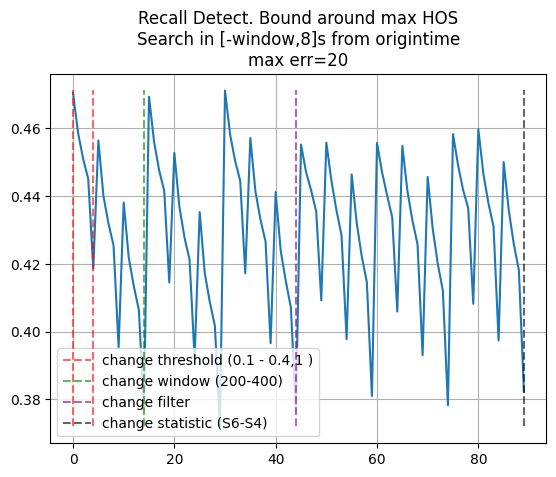

In [108]:
import matplotlib.pyplot as plt
import numpy as np
min_ = np.min(recall)
max_ = np.max(recall)
plt.plot(recall[::])

plt.grid()
plt.vlines([0,4],min_,max_, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
plt.vlines([14,],min_,max_, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (200-400)")
plt.vlines(44,min_,max_, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter")
plt.vlines(89,min_,max_, color="black", zorder=51-1, alpha=0.6, linestyle="--", label="change statistic (S6-S4)")
#plt.ylim([0.5,0.65])
plt.title(f"Recall Detect. Bound around max HOS\nSearch in [-window,8]s from origintime\nmax err={bonta_th}")
plt.legend()

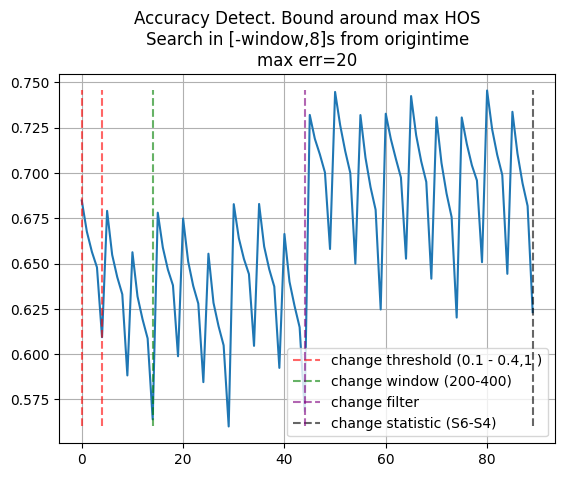

In [107]:
import matplotlib.pyplot as plt
import numpy as np
min_ = np.min(precision)
max_ = np.max(precision)
plt.plot(precision[::])

plt.grid()
plt.vlines([0,4],min_,max_, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
plt.vlines([14,],min_,max_, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (200-400)")
plt.vlines(44,min_,max_, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter")
plt.vlines(89,min_,max_, color="black", zorder=51-1, alpha=0.6, linestyle="--", label="change statistic (S6-S4)")
#plt.ylim([0.5,0.68])
plt.title(f"Accuracy Detect. Bound around max HOS\nSearch in [-window,8]s from origintime\nmax err={bonta_th}")
plt.legend()


In [105]:
bonta_th = 20
std_mx = 15
recall = []
precision = []
for i in range(len(ons_2.keys())//5):
#    print(ons_2.iloc[:,2+i*5:2+i*5+5].keys())
    indi_concordi = list(ons_2.iloc[:,2+i*5:2+i*5+5][(ons_2.iloc[:,2+i*5:2+i*5+5].std(axis=1)<=std_mx) & (ons_2.iloc[:,2+i*5]>0)].index)
    for key in ons_2.iloc[:,2+i*5:2+i*5+5].keys():
        diff = ons_2["trace_P_arrival_sample"][indi_concordi] - ons_2[key][indi_concordi] 
        precision.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))
        recall.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(ons_2["trace_P_arrival_sample"]))

<AxesSubplot:>

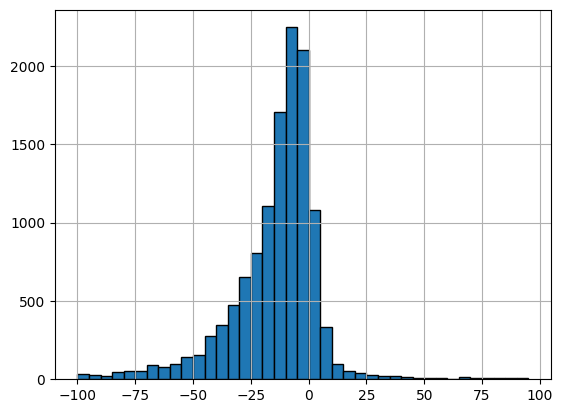

In [70]:
BEST_key = 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1'
diff = ons_2["trace_P_arrival_sample"][indi_concordi] - ons_2[BEST_key][indi_concordi] 
u = np.arange(-100,100,5)
diff.hist(edgecolor="black", bins=u)

In [100]:
stdstudy = []
stdrcl = []
for std_mx in [0,1,2,3,4,5,6,7,8,9,10,12,13,15,17,19,21,25,26,28,30,32,35,37,40]:
    i= 10
    indi_concordi = list(ons_2.iloc[:,2+i*5:2+i*5+5][(ons_2.iloc[:,2+i*5:2+i*5+5].std(axis=1)<=std_mx) & (ons_2.iloc[:,2+i*5]>0)].index)
    BEST_key = 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1'
    diff = ons_2["trace_P_arrival_sample"][indi_concordi] - ons_2[BEST_key][indi_concordi] 
    prec = len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff)
    stdstudy.append(prec)
    stdrcl.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(ons_2["trace_P_arrival_sample"]))

for i in range( len(stdstudy)):
    print(stdstudy[i],stdrcl[i],"\t", [0,1,2,3,4,5,6,7,8,9,10,12,13,15,17,19,21,25,26,28,30,32,35,37,40][i])

## Verifica visiva  tracce

In [9]:
from Classe_sismogramma_v3 import ClasseDataset
D=ClasseDataset()
D.leggi_custom_dataset("/home/silvia/Desktop/Data/DETECT/Detect_data_picked_extended.hdf5","/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv")
D.demean()

/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
i = 0

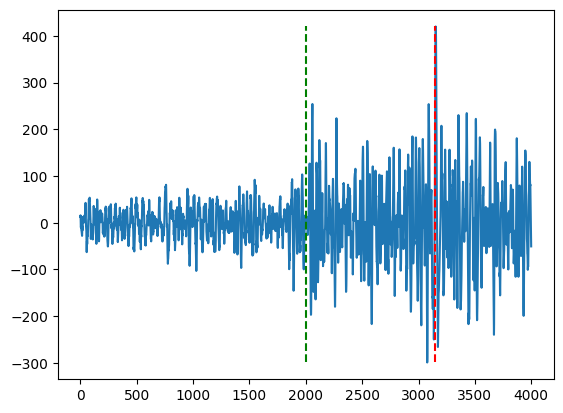

In [120]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
import _Library_HOS
s = 2000

sig =  _Library_HOS.freq_filter(D.sismogramma[indi[i]], 100, [1,20], type_filter= "bandpass")
#sig = D.sismogramma[indi[i]]
arrivo = D.metadata["trace_P_arrival_sample"][indi[i]]
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])

plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")



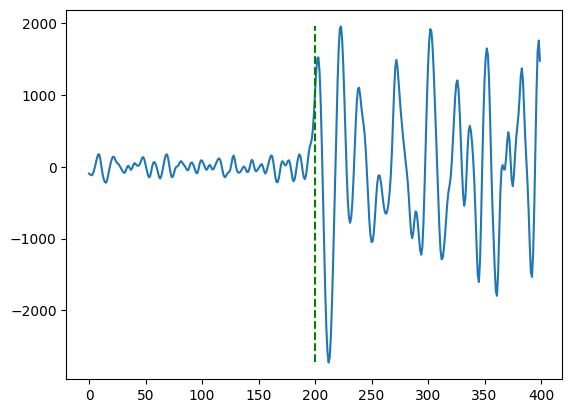

In [44]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
import _Library_HOS
s = 200
i = 141

sig =  _Library_HOS.freq_filter(D.sismogramma[i], 100, [1,20], type_filter= "bandpass")
#sig = D.sismogramma[i]
arrivo = D.metadata["trace_P_arrival_sample"][i]
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])

plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
#plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")

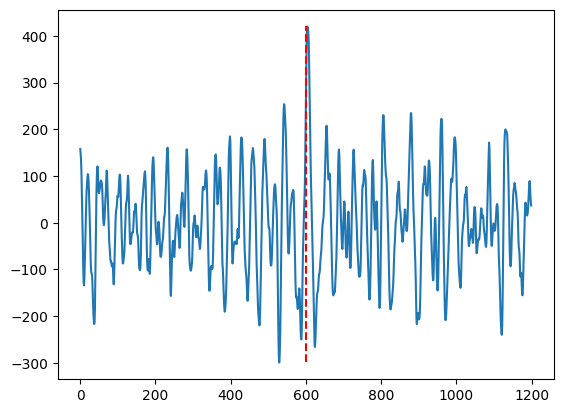

In [123]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
import _Library_HOS
s = 600

pic = ons_2[vedok][i]
arrivo = D.metadata["trace_P_arrival_sample"][i]


sig =  _Library_HOS.freq_filter(D.sismogramma[i], 100, [1,20], type_filter= "bandpass")
plt.plot(sig[pic-s:pic+s])

min_ = np.min(sig[pic-s:pic+s])
max_ = np.max(sig[pic-s:pic+s])

#plt.vlines(arrivo-pic+s,min_,max_,color="green", label = "arrivo", linestyles="--")
plt.vlines(s,min_,max_,color="red", label = "arrivo", linestyles="--")

# Accetto picks se allo stesso array sono "concordi"

In [10]:
# calc max interdistance (and max difference in time-samples) among same array
import pandas as pd
def calc_max_distance(tolerance =  40):
    dist_max_array = {}
    samples_max_array = {}
    dists=pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_rad.csv").set_index("Unnamed: 0") * 6373
    arr = ["01","02","03","04","05","06","07","08","09"] + [str(i) for i in range(10,21)]
    st = arr[0:10]
    lista_key = [[f"S{i}{j}" for i in st ] for j in arr]

    for k in range(20):
        lista_ok = [i for i in lista_key[k] if i in dists.keys()]
        dist_max_array[str(k+1).zfill(2)] = dists.loc[lista_ok,lista_ok].max().max()
        samples_max_array[str(k+1).zfill(2)] = dist_max_array[str(k+1).zfill(2)] / 5.5 * 200 + tolerance 
    return samples_max_array
    

In [ ]:
# DIST massima staz stesso array è 5.8 km, ~ 1 sec di P ~ 200 samples. Generalmente è sui 2 km ~ 70 samples

import pandas as pd
import numpy as np
from _Library_HOS import cluster_agg_max_distance, accept_cluster
times_hos = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole.csv")
times_hos["Accept"] = "FALSE"

BEST_key = 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1' # migliori predizioni
all_best_keys = ['stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1',
                 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2',
                 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3',
                 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4',
                 'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max']
std_mx = 15 
dmaxs = calc_max_distance(tolerance = 40)

uu = []

indi_concordi = list(times_hos[all_best_keys][(times_hos[all_best_keys].std(axis=1)<=std_mx) & (times_hos[BEST_key]>0)].index) # check different thresholds are in accordance
times_concordi = times_hos[["trace_name"]+all_best_keys].iloc[indi_concordi,:]

ev_list = np.array([s[:12] for s in times_concordi["trace_name"]])
ev_uniq = list(set(ev_list))
ev_uniq.sort()

for ev in ev_uniq:
    tmp = times_concordi[(ev_list==ev)]                         # select a single event
    arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
    arr_uniq = list(set(arr_list))
    arr_uniq.sort()
    for arr in arr_uniq:
        tmp_2 = tmp[(arr_list==arr)]                            # select a single array for each event          
        picks = tmp_2[BEST_key]

        if len(picks) < 3:
            # NON ho metodo per stimare affidabilità, rifiuto 
            times_hos["Accept"][picks.index] = "POCHI"
            
        if len(picks) == 3:
            # Controllo max - min, deve essere nel range (non mi fido di cluster di soli 2 elementi)
            if (picks.max()-picks.min()) < dmaxs[arr]:
                times_hos["Accept"][picks.index] = "TRUE"

        if len(picks) > 3:
            picks = picks.sort_values()
            picks_l = list(picks.values)
            if len(picks) == 7:
                uu.append(picks_l+[arr])
            s,e = cluster_agg_max_distance(picks_l,dmax=dmaxs[arr])
            # for i in range(len(s)):
            #     print(picks_l[s[i]:e[i]+1])
            indi = accept_cluster(s,e)

            if indi >=0:
                times_hos["Accept"][picks[s[indi]:e[indi]+1].index] = "TRUE"

                
#times_hos.to_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv", index=False)

In [10]:
times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"]>0)]


,trace_name,trace_P_arrival_sample,"stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max",Accept
9,210901012118.S0213.CHZ,6455,6458,6459,6474,6475,6476,True
16,210901012118.S0313.DHZ,6490,6498,6503,6503,6504,6508,True
23,210901012118.S0413.DHZ,6473,6476,6476,6476,6476,6478,True
50,210901012118.S0813.DHZ,6483,6483,6484,6484,6484,6485,True
57,210901012118.S0913.DHZ,6490,6499,6499,6499,6500,6501,True
...,...,...,...,...,...,...,...,...
300694,220228163700.S1017.DHZ,6700,6703,6703,6703,6703,6705,True
300710,220228163810.S0115.CHZ,6462,6466,6466,6467,6467,6468,True
300725,220228163810.S0215.CHZ,6462,6462,6462,6462,6462,6464,True
300739,220228163810.S0315.DHZ,6462,6464,6465,6465,6465,6466,True


In [11]:
times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"]<0)]

,trace_name,trace_P_arrival_sample,"stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max",Accept
15,210901012118.S0312.DHZ,-1,6591,6591,6591,6591,6593,True
29,210901012118.S0512.DHZ,-1,6582,6582,6582,6582,6584,True
30,210901012118.S0513.DHZ,-1,6488,6489,6489,6489,6498,True
34,210901012118.S0609.DHZ,-1,6480,6484,6484,6484,6485,True
36,210901012118.S0612.DHZ,-1,6599,6600,6600,6600,6625,True
...,...,...,...,...,...,...,...,...
300680,220228163700.S0915.DHZ,-1,6566,6566,6566,6566,6567,True
300692,220228163700.S1013.DHZ,-1,6889,6889,6890,6890,6917,True
300693,220228163700.S1015.DHZ,-1,6571,6571,6571,6571,6573,True
300810,220228163810.S0815.DHZ,-1,6476,6476,6477,6477,6478,True


In [13]:
from Classe_sismogramma_v3 import ClasseDataset
hd = "/home/silvia/Desktop/Data/DETECT/Detect_all_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)

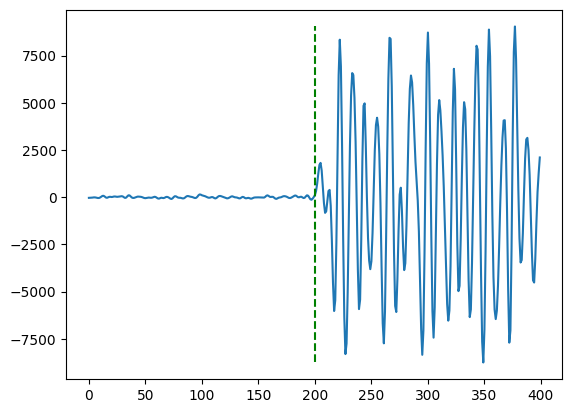

In [30]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
import _Library_HOS
s = 200

i=59
u = times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"]<0)]
indi = u.index[i]

sig =  _Library_HOS.freq_filter(D.sismogramma[indi], 200, [1,30], type_filter= "bandpass")
# sig = D.sismogramma[indi[i]]
arrivo = u["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][indi]
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])

plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
#plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")

In [22]:
indi = times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"]<0)].index[0]
indi

15

# Verify Semblance

In [1]:
import pandas as pd
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import _Library_HOS
import scipy.signal as sc_sig
hd = "/home/silvia/Desktop/Data/DETECT/Detect_all_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv"
D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
D.demean()

times_hos = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE") * (times_hos["trace_P_arrival_sample"] >= 0)]

In [3]:
D.demean(semiamp = 200)

In [2]:
import pandas as pd
import numpy as np
times_hos= pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE") * (times_hos["trace_P_arrival_sample"] >= 0)]

event_list = np.array([s[:12] for s in times_hos_cond["trace_name"]])
event_uniq = list(set(event_list))
event_uniq.sort()

In [189]:
# ['211023010730', '02'],
k = 2
ev = event_uniq[k]
tmp = times_hos_cond[(event_list==ev)]                         # select a single event
#tmp = times_hos_cond[(event_list=="211023010730")]
arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
arr_uniq = list(set(arr_list))
arr_uniq.sort()

kk = 2
arr = arr_uniq[kk]
tmp_2 = tmp[(arr_list==arr)]
#tmp_2 = tmp[(arr_list=="02")]

In [190]:
tmp_2

,trace_name,trace_P_arrival_sample,"stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max",Accept
100026,211023010730.S0202.CHZ,7430,7425,7426,7426,7426,7427,True
100043,211023010730.S0302.DHZ,7405,7399,7400,7413,7413,7414,True
100062,211023010730.S0402.DHZ,7422,7427,7428,7428,7429,7434,True
100082,211023010730.S0502.DHZ,7430,7427,7428,7428,7429,7434,True
100135,211023010730.S0802.DHZ,7405,7398,7399,7399,7399,7400,True
100154,211023010730.S0902.DHZ,7398,7393,7393,7393,7394,7395,True
100171,211023010730.S1002.DHZ,7437,7433,7433,7434,7438,7439,True


Text(0.5, 1.0, 'Semblance vs max error samples in arrival varing window post samples\n Unfiltered waveforms - high error')

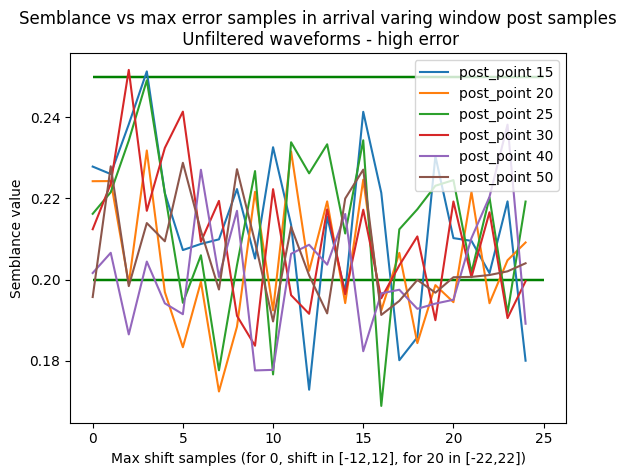

In [154]:
s_ = 50
s  = 20
prove = 50

ss = [15,20,25,30,40,50]
semblances=[[]for io in range(len(ss))]
for jj,s in enumerate(ss):
    for k in range(25,50): # for k in range(25,50): for high error
        aio = 0
        for tent in range(prove):
            off = np.random.randint(k, size=5)-k//2
            #u = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]
            u = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]    
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]    
            aio += _Library_HOS.semblance(u)
        semblances[jj].append(aio/prove)
import matplotlib.pyplot as plt
for i in range(len(semblances)):
    plt.plot(semblances[i], label=f"post_point {ss[i]}")
    plt.hlines([0.2,0.25],0,len(semblances[i]),color="green",zorder=-1)
plt.legend()
plt.xlabel("Max shift samples (for 0, shift in [-12,12], for 20 in [-22,22])")
plt.ylabel("Semblance value")
plt.title("Semblance vs max error samples in arrival varing window post samples\n Unfiltered waveforms - high error")

Text(0.5, 1.0, 'Filtered waveforms - noise \n Semblance varing window size')

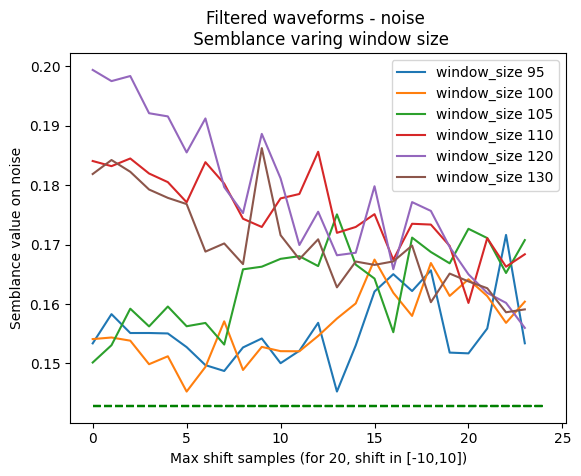

In [245]:
s_ = 80
s  = 20
prove = 30
ss = [15,20,25,30,40,50]
semblances=[[]for io in range(len(ss))]
for jj,s in enumerate(ss):
    for k in range(1,25):
        aio = 0
        for tent in range(prove):
            off = np.random.randint(k, size=len(tmp_2))-k//2 - 200
            #u = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]
            u = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]    
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]    
            aio += _Library_HOS.semblance(u)
        semblances[jj].append(aio/prove)
import matplotlib.pyplot as plt
for i in range(len(semblances)):
    plt.plot(semblances[i], label=f"window_size {ss[i]+s_}")
    plt.hlines(1/len(tmp_2),0,len(semblances[i]),color="green",zorder=-1,linestyle="--")
plt.legend()
plt.xlabel("Max shift samples (for 20, shift in [-10,10])")
plt.ylabel("Semblance value on noise")
plt.title("Filtered waveforms - noise \n Semblance varing window size")

Text(0.5, 1.0, 'Semblance varing pre-arrival window\nAt fixed(x, pre_) Mean on 50 different error. Unfiltered waveforms.')

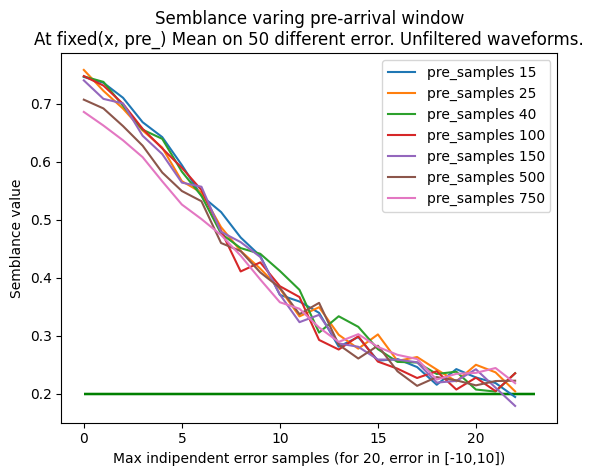

In [166]:
s_ = 50
s  = 40

ss = [15,25,40,100,150,500,750]
semblances=[[]for io in range(len(ss))]
for jj,s_ in enumerate(ss):
    for k in range(2,25):
        aio = 0
        for tent in range(50):
            off = np.random.randint(k, size=5) - k//2
            #u = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_+off[j]:D.metadata["trace_P_arrival_sample"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]
            u = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]    
            #u = [_Library_HOS.freq_filter(D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]    
            aio += _Library_HOS.semblance(u)
        semblances[jj].append(aio/50)
import matplotlib.pyplot as plt
for i in range(len(semblances)):
    plt.plot(semblances[i], label=f"pre_samples {ss[i]}")
    plt.hlines(0.2,0,len(semblances[i]),color="green",zorder=-1)
plt.legend()
plt.xlabel("Max indipendent error samples (for 20, error in [-10,10])")
plt.ylabel("Semblance value")
plt.title(f"Semblance varing pre-arrival window\nAt fixed(x, pre_) Mean on {tent+1} different error. Unfiltered waveforms.")

Text(0.5, 1.0, 'Filtered waveforms.\n Random Error in [-2,2] on arrival sample')

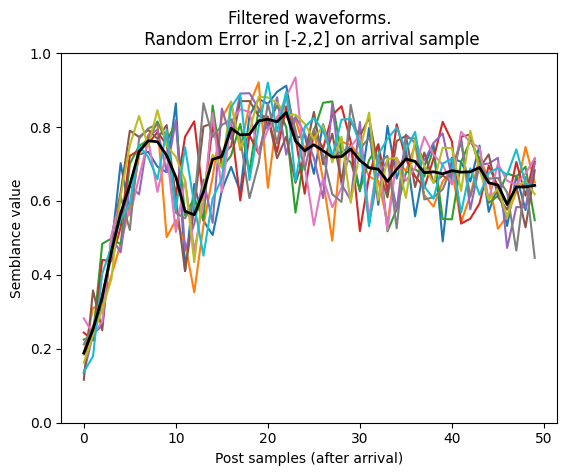

In [44]:
import matplotlib.pyplot as plt
s_ = 30
semblances = [[] for i in range(10)]
err = 5
for i_err in range(10):
    for s in range(50):
        off = [0 for i in range(5)]
        off = np.random.randint(err, size=5)-err//2
        u = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]] for j,i in enumerate(tmp_2.index)]    
        #u = [_Library_HOS.freq_filter(D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_+off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s+off[j]], 200, [1,30], type_filter= "bandpass") for j,i in enumerate(tmp_2.index)]    
        semblances[i_err].append(_Library_HOS.semblance(u))
    plt.plot(semblances[i_err])
semblances = np.array(semblances)
semblances = semblances.mean(axis=0)
plt.plot(semblances,zorder=10,linewidth =2,color="black")
plt.ylim(0.0,1)
plt.xlabel("Post samples (after arrival)")
plt.ylabel("Semblance value")
plt.title(f"Filtered waveforms.\n Random Error in [-{err//2},{err//2}] on arrival sample")

In [ ]:
[10,15,20,25,30,40,50]

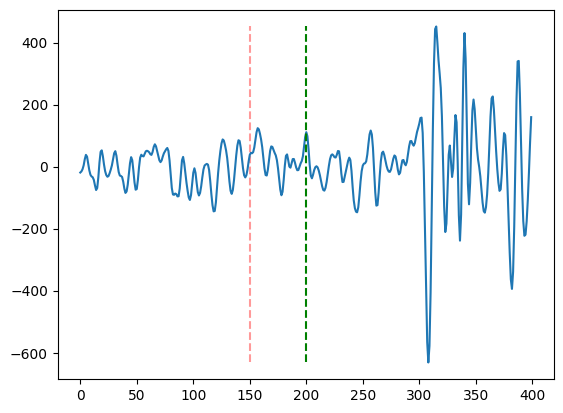

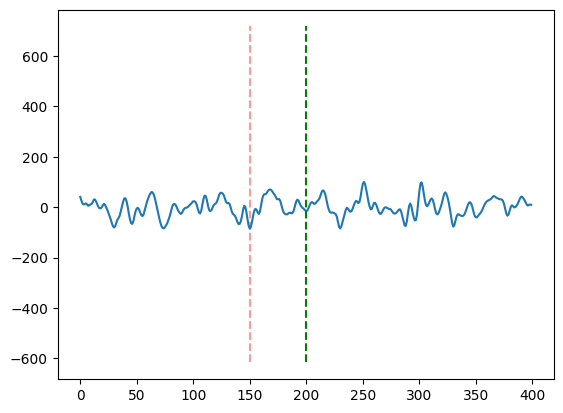

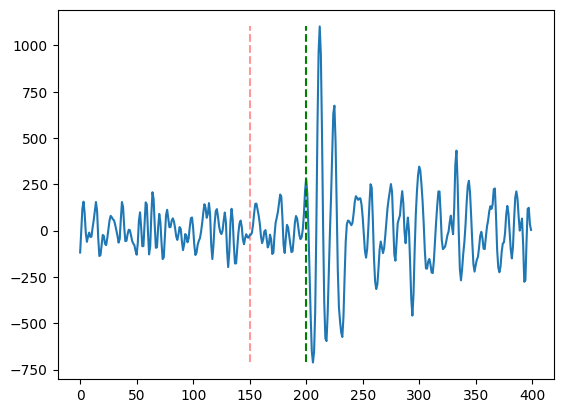

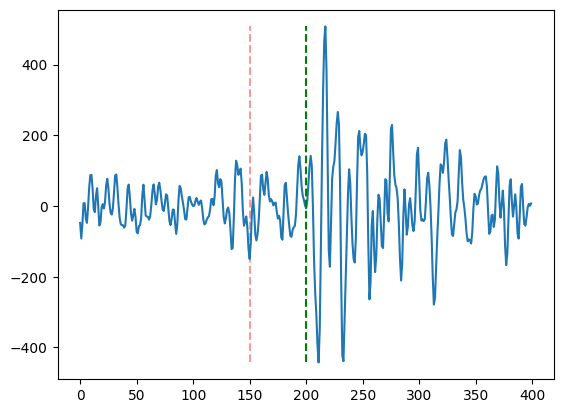

In [20]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
import _Library_HOS
semi = 200
ind = list(tmp_2.index)
s_ = 50
s  = 50
off= [-100,-350,0,0,0,0,0,0]

j = 0
for ii in ind:
   
    sig =  _Library_HOS.freq_filter(D.sismogramma[ii], 200, [1,30], type_filter= "bandpass")
    #sig = D.sismogramma[ii]
    arrivo = D.metadata["trace_P_arrival_sample"][ii]
    plt.plot(sig[arrivo-semi+off[j]:arrivo+semi+off[j]])
    min_ = np.min(sig[arrivo-semi:arrivo+semi])
    max_ = np.max(sig[arrivo-semi:arrivo+semi])

    plt.vlines(semi,min_,max_,color="green", label = "arrivo", linestyles="--")
    plt.vlines([semi-s_],min_,max_,color="red", label = "arrivo", linestyles="--",zorder=-5,alpha=0.4)
    plt.show()
    j +=1
    #plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")

# Calc Semblance

In [8]:
import pandas as pd
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import _Library_HOS
from _Library_HOS import semblance
import scipy.signal as sc_sig
import matplotlib.pyplot as plt
# hd = "/home/silvia/Desktop/Data/DETECT/Detect_all_data_extended.hdf5"
# cs = "/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv"
# D = ClasseDataset()
# D.leggi_custom_dataset(hd,cs)
# D.demean()
# #D.demean(semiamp = 200)
# semblance_noises = {}





In [22]:
from _Library_HOS import semblance
s_ = 25
s = 50
ntracce = 8

times_hos= pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"] >= 0)]
#times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE")]


event_list = np.array([s[:12] for s in times_hos_cond["trace_name"]])
event_uniq = list(set(event_list))
event_uniq.sort()

semblance_HOS = []
semblance_cat = []
semblance_noise = []
#semblance_noises = {}
why = []
for ev in event_uniq:
    tmp = times_hos_cond[(event_list==ev)]                         # select a single event
    arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
    arr_uniq = list(set(arr_list))
    arr_uniq.sort()
    for arr in arr_uniq:
        tmp_2 = tmp[(arr_list==arr)]
        off = np.random.randint(60,size=len(tmp_2))
        #u_HOS = [_Library_HOS.freq_filter( D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]
        #u_cat = [ _Library_HOS.freq_filter( D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]
        #u_noise = [_Library_HOS.freq_filter( D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]    
        u_HOS = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s] for j,i in enumerate(tmp_2.index)]    
        u_cat = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s] for j,i in enumerate(tmp_2.index)]
        u_noise = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100-off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100-off[j]] for j,i in enumerate(tmp_2.index)]    
        
        # u_HOS = np.abs(u_HOS)
        # u_cat = np.abs(u_cat)
        # u_noise = np.abs(u_noise)
        
        if len(u_HOS) > 1:
            semblance_HOS.append(semblance(u_HOS)- 1/len(u_HOS))
            semblance_cat.append(semblance(u_cat)- 1/len(u_cat))
            semblance_noise.append(semblance(u_noise)- 1/len(u_noise))
            if (semblance(u_noise)- 1/len(u_noise) )> 0.08:
                why.append([ev,arr])
#semblance_noises[f"ntracce = {ntracce}"] = semblance_noise


Text(0.22067139306037936, 471.0, 'Semblance settings:\nnot filtered traces\nsamples before=25\nsamples after=50\nNumber of traces = 8')

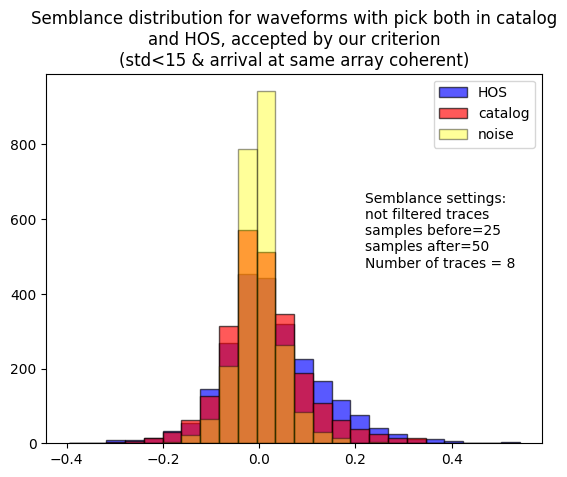

In [23]:
mi=min(np.min(semblance_cat),np.min(semblance_noise),np.min(semblance_HOS))
ma=max(np.max(semblance_cat),np.max(semblance_noise),np.max(semblance_HOS))
binn = np.linspace(mi, ma, num=25, endpoint=True, retstep=False, dtype=None, axis=0)
plt.hist(semblance_HOS, edgecolor="black",bins=binn, alpha=0.65, label="HOS",color="blue")
plt.hist(semblance_cat, edgecolor="black",bins=binn, alpha=0.65, label="catalog", color="red")
ah, bh, ch =  plt.hist(semblance_noise, edgecolor="black",bins=binn, alpha=0.4, label="noise",color="yellow")
plt.title("Semblance distribution for waveforms with pick both in catalog\nand HOS, accepted by our criterion\n(std<15 & arrival at same array coherent)")
plt.legend()
plt.text(ma/2-0.05,np.max(ah)/2,f"Semblance settings:\nnot filtered traces\nsamples before={s_}\nsamples after={s}\nNumber of traces = {ntracce}")

In [23]:
s_ = 50
s = 50
ntracce = []
S_th = 0.06
indici_buone = []

times_hos= pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
#times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE") & (times_hos["trace_P_arrival_sample"] >= 0)]
times_hos_cond = times_hos[(times_hos["Accept"] == "TRUE")]


event_list = np.array([s[:12] for s in times_hos_cond["trace_name"]])
event_uniq = list(set(event_list))
event_uniq.sort()

semblance_HOS = []
#semblance_cat = []
semblance_noise = []
#semblance_noises = {}

for ev in event_uniq:
    tmp = times_hos_cond[(event_list==ev)]                         # select a single event
    arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
    arr_uniq = list(set(arr_list))
    arr_uniq.sort()
    for arr in arr_uniq:
        tmp_2 = tmp[(arr_list==arr)]
        #u_HOS = [_Library_HOS.freq_filter( D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]
        #u_cat = [ _Library_HOS.freq_filter( D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]
        #u_noise = [_Library_HOS.freq_filter( D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100], 200, [1,30], type_filter= "bandpass") for i in tmp_2.index]    
        u_HOS = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s] for j,i in enumerate(tmp_2.index)]    
        #u_cat = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s] for j,i in enumerate(tmp_2.index)]
        u_noise = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100] for j,i in enumerate(tmp_2.index)]    

        
        
        semblance_HOS.append(semblance(u_HOS)- 1/len(u_HOS))

        semblance_noise.append(semblance(u_noise)- 1/len(u_noise))
        if semblance_HOS[-1] > S_th:
            for iok in tmp_2.index:
                indici_buone.append(iok)
        ntracce.append(len(tmp_2))
semblance_HOS = np.array(semblance_HOS)
ntracce = np.array(ntracce)
indici_buone = np.array(indici_buone)

Text(0.217110897415222, 875.5, 'Semblance settings:\nnot filtered traces\nsamples before=50\nsamples after=50')

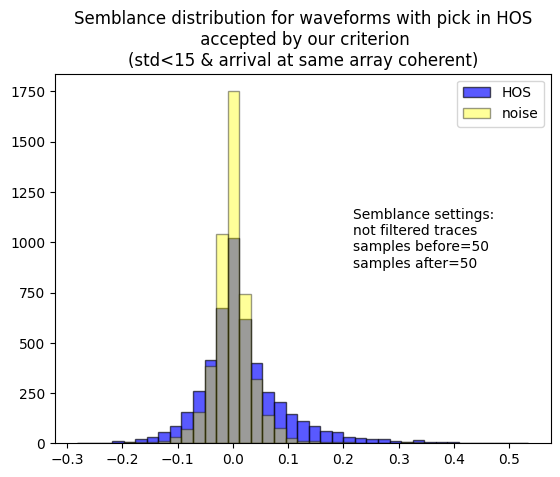

In [9]:
mi=min(np.min(semblance_noise),np.min(semblance_HOS))
ma=max(np.max(semblance_noise),np.max(semblance_HOS))
binn = np.linspace(mi, ma, num=40, endpoint=True, retstep=False, dtype=None, axis=0)
plt.hist(semblance_HOS, edgecolor="black",bins=binn, alpha=0.65, label="HOS",color="blue")

ah, bh, ch =  plt.hist(semblance_noise, edgecolor="black",bins=binn, alpha=0.4, label="noise",color="yellow")
plt.title("Semblance distribution for waveforms with pick in HOS\n accepted by our criterion\n(std<15 & arrival at same array coherent)")
plt.legend()
plt.text(ma/2-0.05,np.max(ah)/2,f"Semblance settings:\nnot filtered traces\nsamples before={s_}\nsamples after={s}")

In [25]:
len(indici_buone )

5291

# Disegni arrivals schematici

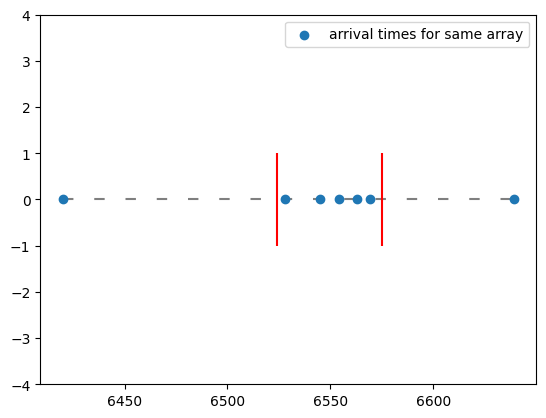

In [91]:
j = 1
plt.scatter(uu[j], [0 for i in range(len(uu[j]))], label="arrival times for same array")
plt.hlines(0,np.min(uu[j]),np.max(uu[j]), linestyles=(0, (5, 10)), color="black", zorder=-1, alpha=0.5)
plt.vlines([6524,6575],-1,1,colors="red")
plt.ylim((-4,4))
plt.legend()


In [69]:
from _Library_HOS import cluster_agg
s,e = cluster_agg(uu[j],dmax=300,th=5)
for i in range(len(s)):
    print(uu[j][s[i]:e[i]+1])

[6420]
[6528, 6545, 6554, 6563, 6569]
[6639]


In [103]:
bio = [6430, 6440, 6450] + uu[j]

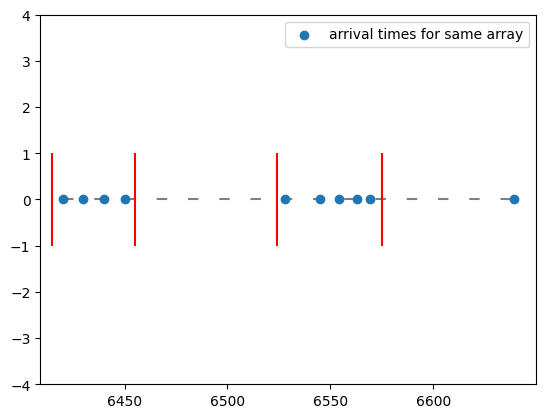

In [123]:

pio = plt.scatter(bio, [0 for i in range(len(bio))], label="arrival times for same array")
plt.hlines(0,np.min(uu[j]),np.max(uu[j]), linestyles=(0, (5, 10)), color="black", zorder=-1, alpha=0.5)
le,ri = plt.xlim()
plt.xlim(le,ri)
plt.vlines([6415, 6455,6524,6575],-1,1,colors="red")
plt.ylim((-4,4))
plt.legend()

# Pick P da catalogo scartati da metodo HOS (std+concordanza aray), why?
prova a prendere i pick di catalogo, vedo che fa concordanza (su quelli non su pick stesse tracce di HOS)

In [4]:
import pandas as pd
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import _Library_HOS
from _Library_HOS import semblance
import scipy.signal as sc_sig
import matplotlib.pyplot as plt
hd = "/home/silvia/Desktop/Data/DETECT/Detect_all_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv"
D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
D.demean()

In [1]:
import pandas as pd
import numpy as np
times = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_ok_cat = times[times["trace_P_arrival_sample"]>0]         # Traces with pick in catalog                           (22772)                         

t1 = times_ok_cat[times_ok_cat.iloc[:,2:6].std(axis=1)<=15]     # Traces pick in cat and with std on HOS < 15           (16245)

t2 = times_ok_cat[times_ok_cat["Accept"] == "POCHI"]            # Traces pick in cat and with std on HOS < 15 but few   ( 1002)     (scartati perchè meno di 3 a stazione)
t3 = times_ok_cat[times_ok_cat["Accept"]=="TRUE"]               # Traces pick in cat with std HOS<15 concordance array  (10611)

t5 = times_ok_cat[times_ok_cat["Accept_catalog_concordance_array"] == "POCHI"]    # Traces pick in cat but few                            ( 5524)     (scartati perchè meno di 3 a stazione) 
t4 = times_ok_cat[times_ok_cat["Accept_catalog_concordance_array"] == "TRUE"]     # Traces pick in cat with concordance array on catalog  (16223) 

# 9467 comuni tra t3 e t4

In [22]:
from _Library_HOS import semblance
s_ = 25
s = 50
ntracce = 8

times = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_ok_cat = times[(times["Accept_catalog_concordance_array"] == "TRUE")]
times_ok_hos = times[(times["Accept"] == "TRUE")]



event_list = np.array([s[:12] for s in times_ok_cat["trace_name"]])
event_uniq = list(set(event_list))
event_uniq.sort()

semblance_cat = []

for ev in event_uniq:
    tmp = times_ok_cat[(event_list==ev)]                         # select a single event
    arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
    arr_uniq = list(set(arr_list))
    arr_uniq.sort()
    for arr in arr_uniq:
        tmp_2 = tmp[(arr_list==arr)]
        off = np.random.randint(60,size=len(tmp_2)) 
        #u_HOS = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s] for j,i in enumerate(tmp_2.index)]    
        u_cat = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s] for j,i in enumerate(tmp_2.index)]
        #u_noise = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100-off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100-off[j]] for j,i in enumerate(tmp_2.index)]    

        
        if len(u_cat) > 1 and len(u_cat[0]==s_+s):
            #semblance_HOS.append(semblance(u_HOS)- 1/len(u_HOS))
            semblance_cat.append(semblance(u_cat)- 1/len(u_cat))
            #semblance_noise.append(semblance(u_noise)- 1/len(u_noise))


In [71]:
from _Library_HOS import semblance
s_ = 25
s = 50
ntracce = 8

times = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
times_ok_cat = times[(times["Accept_catalog_concordance_array"] == "TRUE")]
times_ok_hos = times[(times["Accept"] == "TRUE")]
times_all_cat = times[times["trace_P_arrival_sample"]>0]


event_list = np.array([s[:12] for s in times_all_cat["trace_name"]])
event_uniq = list(set(event_list))
event_uniq.sort()

semblance_all_cat = []


for ev in event_uniq:
    tmp = times_all_cat[(event_list==ev)]                         # select a single event
    arr_list = np.array([s[16:18] for s in tmp["trace_name"]])  # select a single array for each event (tipical arr_list=["01", "01", "10"..] )
    arr_uniq = list(set(arr_list))
    arr_uniq.sort()
    for arr in arr_uniq:
        tmp_2 = tmp[(arr_list==arr)]
        off = np.random.randint(60,size=len(tmp_2)) 
        #u_HOS = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s] for j,i in enumerate(tmp_2.index)]    
        u_cat = [D.sismogramma[i][D.metadata["trace_P_arrival_sample"][i]-s_:D.metadata["trace_P_arrival_sample"][i]+s] for j,i in enumerate(tmp_2.index)]
        #u_noise = [D.sismogramma[i][tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]-s_-100-off[j]:tmp_2["stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"][i]+s-100-off[j]] for j,i in enumerate(tmp_2.index)]    

        cond = True
        for uuu in u_cat:
            if len(uuu) != s_+s:
                cond = False
        if len(u_cat) > 1 and cond:
            semblance_all_cat.append(semblance(u_cat)- 1/len(u_cat))
            #semblance_cat.append(semblance(u_cat)- 1/len(u_cat))
            #semblance_noise.append(semblance(u_noise)- 1/len(u_noise))


Text(0.21770910077883338, 0.13789441747572181, 'Semblance settings:\nnot filtered traces\nsamples before=25\nsamples after=50\nNumber of traces = 8')

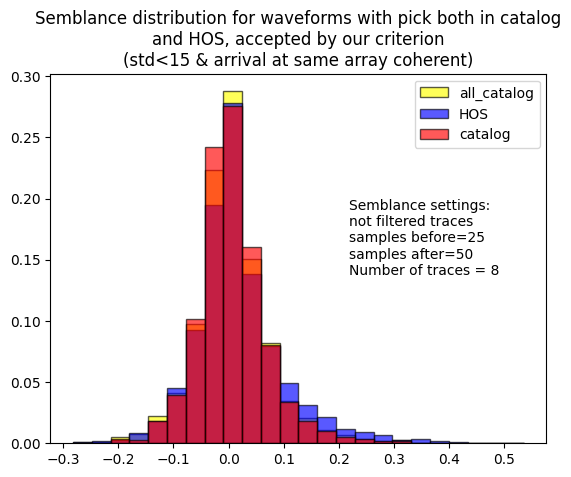

In [95]:
mi=np.min(semblance_HOS)
ma=np.max(semblance_HOS)
binn = np.linspace(mi, ma, num=25, endpoint=True, retstep=False, dtype=None, axis=0)
a_sa, b_sa, c_sa = plt.hist(semblance_all_cat, edgecolor="black",bins=binn, alpha=0.65, label="all_catalog", color="yellow", weights=np.ones(len(semblance_all_cat)) / len(semblance_all_cat))
a_sh, b_sh, c_sh = plt.hist(semblance_HOS, edgecolor="black",bins=binn, alpha=0.65, label="HOS",color="blue", weights=np.ones(len(semblance_HOS)) / len(semblance_HOS))
a_sc, b_sc, c_sc =  plt.hist(semblance_cat, edgecolor="black",bins=binn, alpha=0.65, label="catalog", color="red", weights=np.ones(len(semblance_cat)) / len(semblance_cat))
plt.title("Semblance distribution for waveforms with pick both in catalog\nand HOS, accepted by our criterion\n(std<15 & arrival at same array coherent)")
plt.legend()
plt.text(ma/2-0.05,np.max(ah)/2,f"Semblance settings:\nnot filtered traces\nsamples before={s_}\nsamples after={s}\nNumber of traces = {ntracce}")

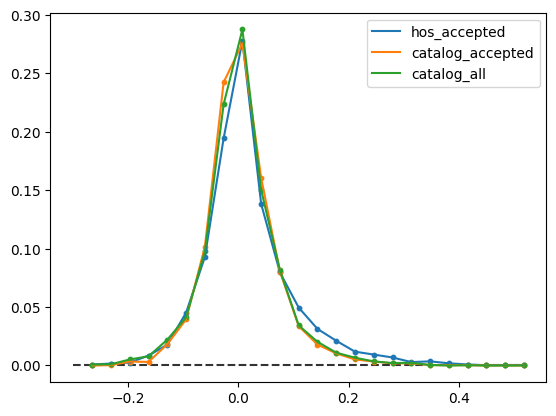

In [116]:
size = 10
bin_global = (bh[0:-1]+ bh[1:])/2

plt.plot(bin_global,a_sh,label="hos_accepted")
plt.scatter(bin_global,a_sh,s=size)

plt.plot(bin_global,a_sc,label="catalog_accepted")
plt.scatter(bin_global,a_sc,s=size)


plt.plot(bin_global,a_sa,label="catalog_all")
plt.scatter(bin_global,a_sa,s=size)
plt.hlines(0,-0.3,0.51,zorder=-2,color="black",linestyles="--",alpha=0.8)
plt.legend()


In [90]:
b = np.array([-1,1,3,5,7])
(b[0:-1]+b[1:])/2

array([0., 2., 4., 6.])

In [162]:
count = 0
for i in t3.index:
    if i in t4.index:
        count += 1
count

9467

#  PAUSE Change _Library_HOS to work on waveforms all at once!

#### Change sliding_window_view and statistics

In [1]:
import Codici._Library_HOS_parallel_computing as _Library_HOS_parallel_computing
import numpy as np

a = np.array([i for i in range(10)]) + np.random.random((10))
b = np.array([i+10 for i in range(10)]) + np.random.random((10))
c = np.array([i+20 for i in range(10)]) + np.random.random((10))
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,10))
tre_traces

array([[ 1.56888843,  2.15675023,  3.69384081,  3.45159547,  4.71701537,
         6.12631746,  6.87529431,  8.53495899,  8.26449068,  9.61450057],
       [11.13526133, 12.11871685, 12.88371162, 14.21732432, 15.38675881,
        16.05977647, 17.02406025, 17.75154621, 18.85652372, 20.14775706],
       [21.24423927, 22.07370784, 23.38646214, 23.34781496, 24.99330981,
        25.12437929, 26.86682034, 28.06015659, 28.80979213, 29.22606121]])

In [ ]:
# FIXME NEW SHAPE
windowed = _Library_HOS.sliding_window_view(tre_traces,(4,),(1,))
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2.shape
#   (num_traces,  num_windows,    len_window)
#   (     3,          7,              4)
# Dopo aver fatto statistica, mi serve avere uno shape di:
#   (num_traces,   num_windows)
_Library_HOS.S_4(reshape2,axis=-1)  # Funziona (per S_6 vedi dopo)

In [ ]:
# FIXME NEW S_6 statistic

data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


In [14]:
windowed = _Library_HOS.sliding_window_view(due_traces,(4,),(1,))
windowed

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [10.4754864 , 11.51315078, 12.51562724, 13.23951818]],

       [[ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631]],

       [[ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488]],

       [[ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119]],

       [[ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665]],

       [[ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721]],

       [[ 6.43628322,  7.91873155,  8.42295917,  9.49055103],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [16]:
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [ 6.43628322,  7.91873155,  8.42295917,  9.49055103]],

       [[10.4754864 , 11.51315078, 12.51562724, 13.23951818],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [18]:
_Library_HOS.sliding_window_view(a,(4,),(1,))

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [21]:
reshape2[0]

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [22]:
_Library_HOS.S_6(reshape2[0])

array([-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
       -12.78527542, -14.05955919, -12.83869574])

In [30]:
axis = -1
data = reshape2[1]
np.sum((data-np.mean(data,axis=axis)[:,None])**6,axis=axis)/(data.shape[1]-1)/np.std(data,ddof=1,axis=axis)**6-15


array([-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
       -13.00344149, -13.60509282, -13.24959532])

In [29]:
data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


array([[-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
        -12.78527542, -14.05955919, -12.83869574],
       [-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
        -13.00344149, -13.60509282, -13.24959532]])

#### Change get_onset

In [1]:
import Codici._Library_HOS_parallel_computing as _Library_HOS_parallel_computing
import _Library_HOS
import numpy as np
import scipy
dim = 20
ar = np.random.random((dim))
br = np.random.random((dim))
cr = np.random.random((dim))
a = np.array([i for i in range(dim)]) + ar
b = np.array([i+dim for i in range(dim)]) + br
c = np.array([i+dim for i in range(dim)]) + cr
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,dim))
#due_traces

In [32]:
i = 1
(scipy.signal.detrend(tre_traces)[i] - scipy.signal.detrend(tre_traces[i])) <=10**-12

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [29]:
type(scipy.signal.detrend(tre_traces)[i]) == type(scipy.signal.detrend(tre_traces[i]))

True

In [31]:
scipy.signal.detrend(tre_traces)[i].shape == scipy.signal.detrend(tre_traces[i]).shape

True

In [41]:
detr3 = scipy.signal.detrend(tre_traces)
detr = scipy.signal.detrend(tre_traces[i])


In [44]:
detr

array([ 0.5615912 , -0.52398539,  0.33060632, -0.09956434,  0.30929549,
        0.34223839, -0.29685693, -0.39836831, -0.14156015, -0.12585499,
       -0.35085872,  0.30898548, -0.95646999,  0.3219786 , -0.29733541,
        0.67086905,  0.6107593 , -0.1091305 , -0.60282567,  0.44648654])

In [80]:
detr3 = np.abs(detr3)
detr3

array([[0.2769372 , 0.00539027, 0.23781113, 0.76792842, 0.6040658 ,
        0.50394588, 0.01248392, 0.50749338, 0.29209979, 0.41432632,
        0.10477848, 0.21853789, 0.09204501, 0.21559625, 0.04088527,
        0.40258429, 0.74149846, 0.41099412, 0.66029148, 0.68065593],
       [0.5615912 , 0.52398539, 0.33060632, 0.09956434, 0.30929549,
        0.34223839, 0.29685693, 0.39836831, 0.14156015, 0.12585499,
        0.35085872, 0.30898548, 0.95646999, 0.3219786 , 0.29733541,
        0.67086905, 0.6107593 , 0.1091305 , 0.60282567, 0.44648654],
       [0.36869017, 0.04175837, 0.37730477, 0.40461304, 0.16904805,
        0.8822817 , 0.19769008, 0.56657281, 0.407991  , 0.74295388,
        0.33676843, 0.10376802, 0.13484077, 0.15498941, 0.25848179,
        0.41456711, 0.26720812, 0.24941324, 0.45031577, 0.00167914]])

In [88]:

_Library_HOS.sliding_window_view(detr3, (4,1), (1,1))

array([], shape=(0, 20, 4, 1), dtype=float64)

In [96]:
_Library_HOS_parallel_computing.sliding_window_view(tre_traces, (4,), (1,))[1]

array([[21.52443   , 21.45618694, 23.32811218, 23.91527505],
       [21.45618694, 23.32811218, 23.91527505, 25.34146841],
       [23.32811218, 23.91527505, 25.34146841, 26.39174484],
       [23.91527505, 25.34146841, 26.39174484, 26.76998304],
       [25.34146841, 26.39174484, 26.76998304, 27.6858052 ],
       [26.39174484, 26.76998304, 27.6858052 , 28.95994688],
       [26.76998304, 27.6858052 , 28.95994688, 29.99298557],
       [27.6858052 , 28.95994688, 29.99298557, 30.78531538],
       [28.95994688, 29.99298557, 30.78531538, 32.4624931 ],
       [29.99298557, 30.78531538, 32.4624931 , 32.21437116],
       [30.78531538, 32.4624931 , 32.21437116, 34.51015328],
       [32.4624931 , 32.21437116, 34.51015328, 34.90817279],
       [32.21437116, 34.51015328, 34.90817279, 36.89371079],
       [34.51015328, 34.90817279, 36.89371079, 37.85093457],
       [34.90817279, 36.89371079, 37.85093457, 38.1483783 ],
       [36.89371079, 37.85093457, 38.1483783 , 38.67201666],
       [37.85093457, 38.